<a href="https://colab.research.google.com/github/PennyQ/MyDataScienceGround/blob/main/Keras/deepgalaxy_origin_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook is an experiment to use Resnet50 and EfficientNetB0 to classify the deep galaxy images into 71 categorities. 

In [3]:
!git clone https://github.com/maxwelltsai/DeepGalaxy.git


Cloning into 'DeepGalaxy'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 194 (delta 89), reused 143 (delta 49), pack-reused 0
Receiving objects: 100% (194/194), 26.77 MiB | 43.45 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
!wget https://surfdrive.surf.nl/files/index.php/s/Mzm28FQ1udG3FG7/download
!pip install keras_applications

--2021-01-15 15:35:02--  https://surfdrive.surf.nl/files/index.php/s/Mzm28FQ1udG3FG7/download
Resolving surfdrive.surf.nl (surfdrive.surf.nl)... 145.100.27.67, 2001:610:108:203b:0:a11:da7a:5afe
Connecting to surfdrive.surf.nl (surfdrive.surf.nl)|145.100.27.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2038916648 (1.9G) [application/octet-stream]
Saving to: ‘download’

download            100%[===================>]   1.90G  24.1MB/s    in 86s     

2021-01-15 15:36:29 (22.6 MB/s) - ‘download’ saved [2038916648/2038916648]



In [7]:
# !python DeepGalaxy/dg_train.py -f download --epochs 20 --noise 0.1 --batch-size 4 --arch EfficientNetB4


2021-01-15 15:38:31.783364: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Namespace(allow_growth=True, batch_size=4, data_loading_mode=0, datasets='s_1_m_1*', debug_mode=False, distributed=True, dnn_arch='EfficientNetB4', epochs=20, file_name='download', gpu_mem_frac=None, lr=1, multi_gpu=False, noise_stddev=0.1, num_cam=14, optimizer='Adadelta')
Error importing horovod. Disabling distributed training.
Selected datasets: ['s_1_m_0.25', 's_1_m_0.5', 's_1_m_0.75', 's_1_m_1', 's_1_m_1.25', 's_1_m_1.5']
Selected camera positions: range(0, 14)
Loading dataset /s_1_m_0.25/images_camera_00
Getting labels...
Loading dataset /s_1_m_0.25/images_camera_01
Getting labels...
Loading dataset /s_1_m_0.25/images_camera_02
Getting labels...
Loading dataset /s_1_m_0.25/images_camera_03
Getting labels...
Loading dataset /s_1_m_0.25/images_camera_04
Getting labels...
Loading dataset /s_1_m_0.25/images_camera_05
Getting labels...
Loadi

     |████████████████████████████████| 51kB 5.5MB/s 


In [10]:
# Self try
from DeepGalaxy.data_io import *

In [15]:
data_io = DataIO()
X, Y = data_io.load_partial('download', 's_1_m_1', camera_pos=[1,2])

Selected datasets: ['s_1_m_1', 's_1_m_1.25', 's_1_m_1.5']
Selected camera positions: [1, 2]
Loading dataset /s_1_m_1/images_camera_01
Getting labels...
Loading dataset /s_1_m_1/images_camera_02


/content/DeepGalaxy/data_io.py:166: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  cat_t = self.h5f['%s/t_myr_camera_%02d' % (dset_name, camera_pos)].value


Getting labels...
Loading dataset /s_1_m_1.25/images_camera_01
Getting labels...
Loading dataset /s_1_m_1.25/images_camera_02
Getting labels...
Loading dataset /s_1_m_1.5/images_camera_01
Getting labels...
Loading dataset /s_1_m_1.5/images_camera_02
Getting labels...


In [31]:
X.shape

(426, 512, 512, 1)

In [18]:
Y.shape

(426,)

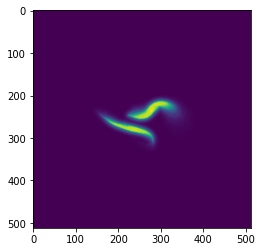

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X[20, :, :, 0].astype(np.float32))
plt.show()

In [26]:
Y[20]

20

In [28]:
import tensorflow as tf

In [45]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(512, 512, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(512, 512, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=(512, 512, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Conv2D(256, 3, activation='relu', input_shape=(512, 512, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Conv2D(256, 3, activation='relu', input_shape=(512, 512, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),

  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(71, activation='softmax', name="output")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 510, 510, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 253, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 256)      

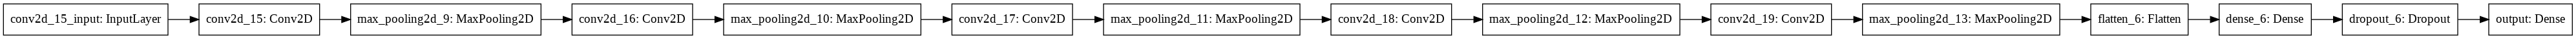

In [47]:
tf.keras.utils.plot_model(
    model=model, to_file="dnn_model.png", show_shapes=False, rankdir="LR")

In [50]:
history = model.fit(X, Y, epochs=30, batch_size=8)

# model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/30
54/54 [==============================] - 4s 66ms/step - loss: 1.3889 - accuracy: 0.5540
Epoch 2/30
54/54 [==============================] - 4s 65ms/step - loss: 1.3199 - accuracy: 0.5446
Epoch 3/30
54/54 [==============================] - 4s 65ms/step - loss: 1.2813 - accuracy: 0.5469
Epoch 4/30
54/54 [==============================] - 4s 66ms/step - loss: 1.2690 - accuracy: 0.5728
Epoch 5/30
54/54 [==============================] - 4s 65ms/step - loss: 1.2615 - accuracy: 0.6103
Epoch 6/30
54/54 [==============================] - 4s 66ms/step - loss: 1.2547 - accuracy: 0.5822
Epoch 7/30
54/54 [==============================] - 4s 66ms/step - loss: 1.2425 - accuracy: 0.5939
Epoch 8/30
54/54 [==============================] - 4s 66ms/step - loss: 1.2877 - accuracy: 0.5775
Epoch 9/30
54/54 [==============================] - 4s 66ms/step - loss: 1.3538 - accuracy: 0.5587
Epoch 10/30
54/54 [==============================] - 4s 66ms/step - loss: 1.2271 - accuracy: 0.5798
Epoch 11/

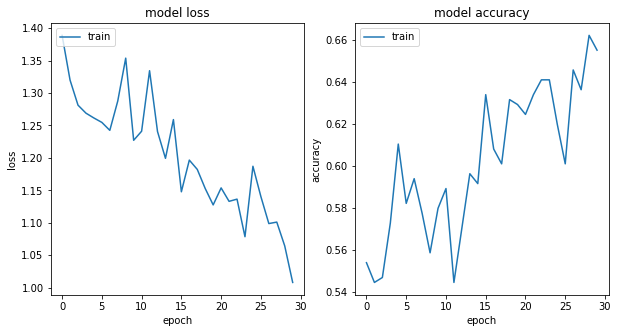

In [51]:
import matplotlib.pyplot as plt
nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))

for idx, key in enumerate(["loss", "accuracy"]):
    ax = fig.add_subplot(nrows, ncols, idx+1)
    plt.plot(history.history[key])
    # plt.plot(history.history["val_{}".format(key)])
    plt.title("model {}".format(key))
    plt.ylabel(key)
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left");

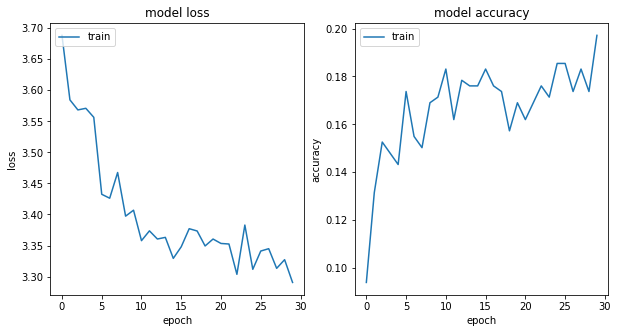

In [42]:
# 8 million parameters
import matplotlib.pyplot as plt
nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))

for idx, key in enumerate(["loss", "accuracy"]):
    ax = fig.add_subplot(nrows, ncols, idx+1)
    plt.plot(history.history[key])
    # plt.plot(history.history["val_{}".format(key)])
    plt.title("model {}".format(key))
    plt.ylabel(key)
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left");

In [55]:
# restnet50

model = tf.keras.applications.ResNet50(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(512, 512, 1),
        pooling=None,
        classes=71)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.581305 to fit



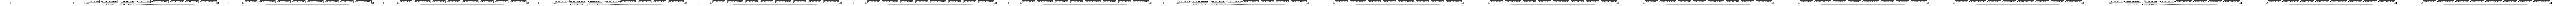

In [54]:
tf.keras.utils.plot_model(
    model=model, to_file="resnet50.png", show_shapes=False, rankdir="LR")

In [58]:
history = model.fit(X, Y, epochs=30, batch_size=8)


Epoch 1/30
54/54 [==============================] - 21s 378ms/step - loss: 4.0186 - accuracy: 0.0235
Epoch 2/30
54/54 [==============================] - 21s 383ms/step - loss: 3.8102 - accuracy: 0.0493
Epoch 3/30
54/54 [==============================] - 21s 386ms/step - loss: 3.6074 - accuracy: 0.0352
Epoch 4/30
54/54 [==============================] - 21s 388ms/step - loss: 3.5622 - accuracy: 0.0540
Epoch 5/30
54/54 [==============================] - 21s 389ms/step - loss: 3.2361 - accuracy: 0.0751
Epoch 6/30
54/54 [==============================] - 21s 391ms/step - loss: 3.1580 - accuracy: 0.0610
Epoch 7/30
54/54 [==============================] - 21s 393ms/step - loss: 3.0221 - accuracy: 0.1103
Epoch 8/30
54/54 [==============================] - 21s 394ms/step - loss: 2.9281 - accuracy: 0.1033
Epoch 9/30
54/54 [==============================] - 21s 395ms/step - loss: 2.8558 - accuracy: 0.1056
Epoch 10/30
54/54 [==============================] - 21s 397ms/step - loss: 2.8009 - accura

KeyboardInterrupt: ignored

In [59]:
# efficientnet

model = tf.keras.applications.EfficientNetB0(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(512, 512, 1),
        pooling=None,
        classes=71)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
print(model.summary())

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 512, 512, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 512, 512, 1)  3           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 513, 513, 1)  0           normalization[0][0]              
_____________________________________________________________________________________

In [61]:
history = model.fit(X, Y, epochs=30, batch_size=8)


Epoch 1/30
54/54 [==============================] - 29s 406ms/step - loss: 4.6250 - accuracy: 0.0210
Epoch 2/30
54/54 [==============================] - 21s 395ms/step - loss: 3.8789 - accuracy: 0.0389
Epoch 3/30
54/54 [==============================] - 22s 402ms/step - loss: 3.3768 - accuracy: 0.0794
Epoch 4/30
54/54 [==============================] - 22s 402ms/step - loss: 3.1443 - accuracy: 0.1173
Epoch 5/30
54/54 [==============================] - 22s 403ms/step - loss: 2.7635 - accuracy: 0.1794
Epoch 6/30
54/54 [==============================] - 22s 401ms/step - loss: 2.7043 - accuracy: 0.2159
Epoch 7/30
54/54 [==============================] - 22s 405ms/step - loss: 2.3871 - accuracy: 0.2393
Epoch 8/30
54/54 [==============================] - 22s 407ms/step - loss: 2.2647 - accuracy: 0.2526
Epoch 9/30
54/54 [==============================] - 22s 404ms/step - loss: 2.0955 - accuracy: 0.3126
Epoch 10/30
54/54 [==============================] - 22s 410ms/step - loss: 1.9952 - accura